# Problem Set 1

Nima Nikopour

In [ ]:
import numpy as np
from scipy.special import gammaincc, gamma
from scipy.optimize import brentq
import matplotlib.pyplot as plt

## 1.1(b)

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_4186/3128560017.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Aggregate Labor Market ($\lambda={lam}$)')


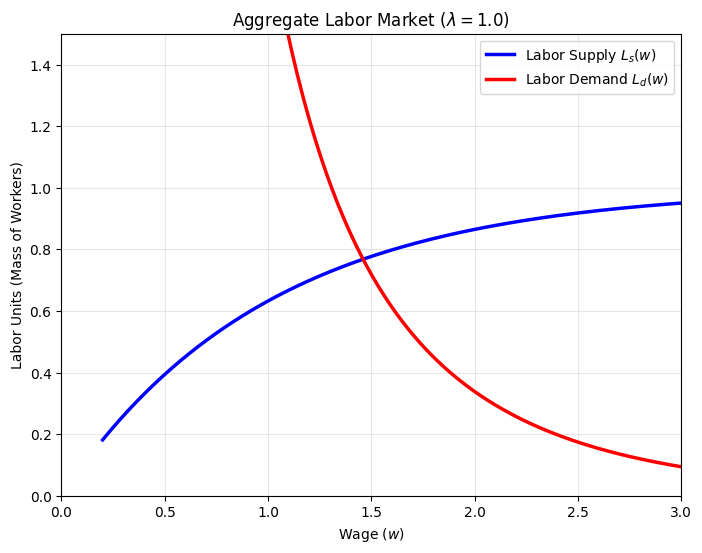

In [18]:
# 1. Setup
lam = 1.0
w = np.linspace(0.2, 3.0, 200) # Start slightly higher to avoid the massive spike

# 2. Define Formulas
L_s = 1 - np.exp(-lam * w)
L_d = (1 / (lam * w)**2) * (gamma(3) * gammaincc(3, lam * w))

# 3. Create the Graph
plt.figure(figsize=(8, 6))

plt.plot(w, L_s, label=r'Labor Supply $L_s(w)$', color='blue', linewidth=2.5)
plt.plot(w, L_d, label=r'Labor Demand $L_d(w)$', color='red', linewidth=2.5)

# --- ZOOM IN ---
plt.ylim(0, 1.5)  # Cut off the infinity spike so we can see the crossing
plt.xlim(0, 3)

plt.title(f'Aggregate Labor Market ($\lambda={lam}$)')
plt.xlabel('Wage ($w$)')
plt.ylabel('Labor Units (Mass of Workers)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('1b_graph.png', dpi=300)
plt.show()

## 1.2

In [21]:
# --- Question 2: Equilibrium Solver (Baseline Model) ---
import numpy as np
from scipy.special import gammaincc, gamma
from scipy.optimize import brentq

# 1. Define Market Functions (nu = 0.5 implicitly)
def labor_supply(w, lam):
    return 1 - np.exp(-lam * w)

def labor_demand(w, lam):
    # Formula: (1 / (lam*w)^2) * Gamma(3, lam*w)
    # We multiply by gamma(3) because scipy's gammaincc is normalized
    return (1 / (lam * w)**2) * (gamma(3) * gammaincc(3, lam * w))

def excess_demand(w, lam):
    return labor_demand(w, lam) - labor_supply(w, lam)

# 2. Solve for Lambda = 1, 2, 3
lambdas = [1, 2, 3]

print(f"{'Lambda':<10} | {'Wage (w*)':<15} | {'Threshold (z*)':<15} | {'% Workers':<15}")
print("-" * 65)

for lam in lambdas:
    # Find the root where Supply = Demand
    w_star = brentq(excess_demand, 0.001, 10.0, args=(lam,))
    
    # Calculate % of population that are workers
    percent_workers = labor_supply(w_star, lam) * 100
    
    # Note: In the baseline model, z* = w*
    print(f"{lam:<10} | {w_star:<15.4f} | {w_star:<15.4f} | {percent_workers:<15.2f}%")



Lambda     | Wage (w*)       | Threshold (z*)  | % Workers      
-----------------------------------------------------------------
1          | 1.4603          | 1.4603          | 76.78          %
2          | 0.7302          | 0.7302          | 76.78          %
3          | 0.4868          | 0.4868          | 76.78          %


In [ ]:
def solve_general_lucas(nu=0.85, lam=1.0):
    # --- 1. Math Setup based on your derivation ---
    
    # The exponent on z in the integral is k = 1/(1-nu)
    # The Gamma parameter is s = k + 1
    k = 1 / (1 - nu)
    s_param = k + 1
    
    # The threshold factor relating z* to w
    # z* = w * [nu / (1-nu)]^(1-nu)
    thresh_factor = (nu / (1 - nu))**(1 - nu)

    # --- 2. Define Market Functions ---

    def labor_supply(w):
        # Supply is Mass(z < z*)
        z_star = w * thresh_factor
        return 1 - np.exp(-lam * z_star)

    def labor_demand(w):
        z_star = w * thresh_factor
        
        # Demand Formula: Ld = [1 / (lam * w)^k] * Gamma(s, lam * z*) / lambda
        # Note: We divide by lambda because of the integration constant 1/lambda^s
        # derived in the math step.
        
        # Calculate Gamma Term (un-regularized)
        gamma_val = gamma(s_param) * gammaincc(s_param, lam * z_star)
        
        # Calculate Denominator (w term)
        w_term = (w)**k
        
        # Combine (Note: 1/lambda factor cancels with one lambda in denominator from integration)
        return (1 / (lam**(s_param-1))) * (gamma_val / w_term)

    def excess_demand(w):
        return labor_demand(w) - labor_supply(w)

    # --- 3. Solve ---
    w_star = brentq(excess_demand, 0.001, 5.0)
    z_star_val = w_star * thresh_factor
    
    print(f"--- Results for nu={nu} ---")
    print(f"Equilibrium Wage (w*): {w_star:.4f}")
    print(f"Threshold (z*):        {z_star_val:.4f}")
    print(f"Workers (%):           {labor_supply(w_star)*100:.2f}%")

# Run for nu = 0.85
if __name__ == "__main__":
    solve_general_lucas(nu=0.85)

--- Results for nu=0.85 ---
Equilibrium Wage (w*): 3.2184
Threshold (z*):        4.1748
Workers (%):           98.46%


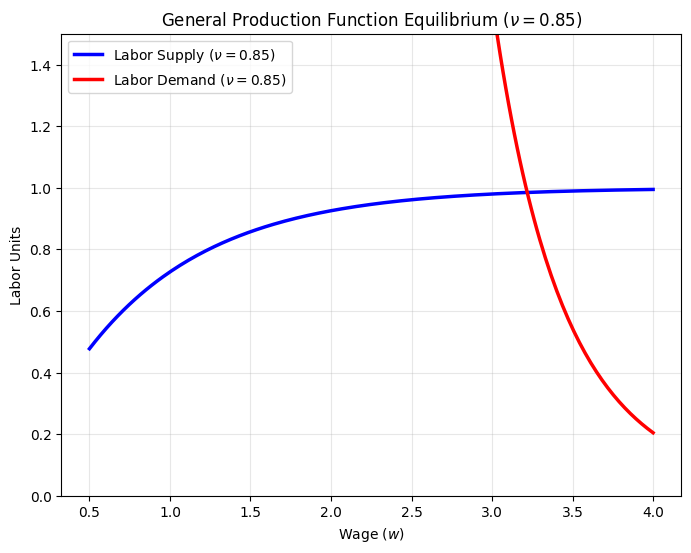

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaincc, gamma

# 1. Parameters for General Model
nu = 0.85
lam = 1.0
w = np.linspace(0.5, 4.0, 200)  # Wage range

# 2. Math Setup
# The power on z in the integral is k = 1/(1-nu)
k = 1 / (1 - nu)
# The Gamma parameter s = k + 1
s_param = k + 1
# The threshold factor relating z* to w
thresh_factor = (nu / (1 - nu))**(1 - nu)

# 3. Calculate Curves
# Threshold vector
z_star = w * thresh_factor

# Labor Supply: 1 - exp(-lambda * z*)
L_s = 1 - np.exp(-lam * z_star)

# Labor Demand: General Gamma Formula
# Ld = [1 / lambda] * [1 / (lam*w)^k] * Gamma(s, lam*z*)
# Note: We multiply by gamma(s) because scipy's gammaincc is normalized
numerator = gamma(s_param) * gammaincc(s_param, lam * z_star)
denominator = lam * ((lam * w)**k)
L_d = numerator / denominator

# 4. Plotting
plt.figure(figsize=(8, 6))

plt.plot(w, L_s, label=r'Labor Supply ($\nu=0.85$)', color='blue', linewidth=2.5)
plt.plot(w, L_d, label=r'Labor Demand ($\nu=0.85$)', color='red', linewidth=2.5)

# Visuals
plt.ylim(0, 1.5) # Zoom in to see intersection
plt.title(r'General Production Function Equilibrium ($\nu=0.85$)')
plt.xlabel('Wage ($w$)')
plt.ylabel('Labor Units')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('general_lucas_graph.png', dpi=300)
plt.show()